In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from IPython.display import Image
import pydotplus

In [83]:
data=pd.read_csv('parkinsons.csv')
data.shape

(240, 48)

In [84]:
data.head(10)

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.263130,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.202170,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.167100,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.208920,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.116070,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023
5,CONT-02,3,0,0,0.16489,0.000010,0.000819,0.001191,0.010666,0.094738,...,1.480657,1.675417,1.373460,1.709614,1.444187,1.383488,1.625396,1.651655,1.652845,1.427623
6,CONT-03,1,0,1,0.22506,0.000014,0.001358,0.001460,0.017181,0.148120,...,1.712147,1.419443,1.501822,1.503534,1.486685,1.648505,1.345959,1.741863,1.828781,1.655604
7,CONT-03,2,0,1,0.23086,0.000015,0.001349,0.001546,0.017775,0.157800,...,1.535326,1.627976,1.332839,1.254560,1.598743,1.297679,1.526714,1.647910,1.662981,1.609652
8,CONT-03,3,0,1,0.22898,0.000015,0.001375,0.001607,0.020110,0.175770,...,1.620783,1.431508,1.598949,1.394543,1.459370,1.313012,1.447470,1.354798,1.585025,1.334293
9,CONT-04,1,0,1,1.31000,0.000103,0.008245,0.006280,0.030742,0.270640,...,1.541010,1.347021,1.526148,1.428505,1.516130,1.491684,1.579521,1.374581,1.550638,1.572821


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          240 non-null    object 
 1   Recording   240 non-null    int64  
 2   Status      240 non-null    int64  
 3   Gender      240 non-null    int64  
 4   Jitter_rel  240 non-null    float64
 5   Jitter_abs  240 non-null    float64
 6   Jitter_RAP  240 non-null    float64
 7   Jitter_PPQ  240 non-null    float64
 8   Shim_loc    240 non-null    float64
 9   Shim_dB     240 non-null    float64
 10  Shim_APQ3   240 non-null    float64
 11  Shim_APQ5   240 non-null    float64
 12  Shi_APQ11   240 non-null    float64
 13  HNR05       240 non-null    float64
 14  HNR15       240 non-null    float64
 15  HNR25       240 non-null    float64
 16  HNR35       240 non-null    float64
 17  HNR38       240 non-null    float64
 18  RPDE        240 non-null    float64
 19  DFA         240 non-null    f

In [86]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recording,240.0,2.000000,0.818203,1.000000,1.000000,2.000000,3.000000,3.000000
Status,240.0,0.500000,0.501045,0.000000,0.000000,0.500000,1.000000,1.000000
Gender,240.0,0.400000,0.490922,0.000000,0.000000,0.000000,1.000000,1.000000
Jitter_rel,240.0,0.583987,0.535769,0.148010,0.298260,0.481455,0.681685,6.838200
Jitter_abs,240.0,0.000044,0.000045,0.000007,0.000019,0.000035,0.000056,0.000550
Jitter_RAP,240.0,0.003172,0.003373,0.000678,0.001551,0.002337,0.003678,0.043843
Jitter_PPQ,240.0,0.003532,0.004449,0.001036,0.001867,0.002870,0.003991,0.065199
Shim_loc,240.0,0.038428,0.023213,0.007444,0.024336,0.032960,0.045475,0.192600
Shim_dB,240.0,0.336832,0.205905,0.064989,0.211785,0.287885,0.399860,1.747600
Shim_APQ3,240.0,0.021499,0.013787,0.003344,0.012909,0.018571,0.025784,0.113240


In [87]:
data.columns

Index(['ID', 'Recording', 'Status', 'Gender', 'Jitter_rel', 'Jitter_abs',
       'Jitter_RAP', 'Jitter_PPQ', 'Shim_loc', 'Shim_dB', 'Shim_APQ3',
       'Shim_APQ5', 'Shi_APQ11', 'HNR05', 'HNR15', 'HNR25', 'HNR35', 'HNR38',
       'RPDE', 'DFA', 'PPE', 'GNE', 'MFCC0', 'MFCC1', 'MFCC2', 'MFCC3',
       'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10',
       'MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2', 'Delta3', 'Delta4',
       'Delta5', 'Delta6', 'Delta7', 'Delta8', 'Delta9', 'Delta10', 'Delta11',
       'Delta12'],
      dtype='object')

In [88]:
data.isnull().sum()

ID            0
Recording     0
Status        0
Gender        0
Jitter_rel    0
Jitter_abs    0
Jitter_RAP    0
Jitter_PPQ    0
Shim_loc      0
Shim_dB       0
Shim_APQ3     0
Shim_APQ5     0
Shi_APQ11     0
HNR05         0
HNR15         0
HNR25         0
HNR35         0
HNR38         0
RPDE          0
DFA           0
PPE           0
GNE           0
MFCC0         0
MFCC1         0
MFCC2         0
MFCC3         0
MFCC4         0
MFCC5         0
MFCC6         0
MFCC7         0
MFCC8         0
MFCC9         0
MFCC10        0
MFCC11        0
MFCC12        0
Delta0        0
Delta1        0
Delta2        0
Delta3        0
Delta4        0
Delta5        0
Delta6        0
Delta7        0
Delta8        0
Delta9        0
Delta10       0
Delta11       0
Delta12       0
dtype: int64

In [89]:
data['Recording'].value_counts()

3    80
2    80
1    80
Name: Recording, dtype: int64

In [90]:
data['Status'].value_counts()

1    120
0    120
Name: Status, dtype: int64

In [91]:
Gender=data['Gender'].value_counts()
print(Gender)

0    144
1     96
Name: Gender, dtype: int64


In [92]:
data['Gender']=data["Gender"].replace(to_replace=0,value="Male")
data['Gender']=data["Gender"].replace(to_replace=1,value="Female")

In [93]:
data["Gender"].value_counts()

Male      144
Female     96
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

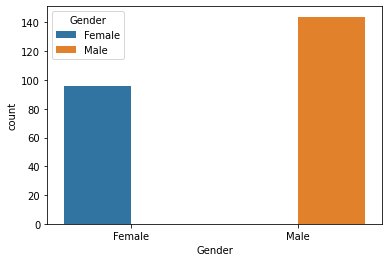

In [94]:
sns.countplot(x="Gender",hue="Gender", data=data)

<AxesSubplot:xlabel='Recording', ylabel='count'>

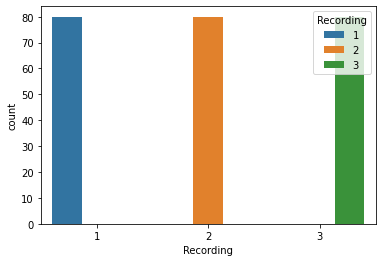

In [95]:
sns.countplot(x="Recording",hue="Recording", data=data)

<AxesSubplot:xlabel='Status', ylabel='count'>

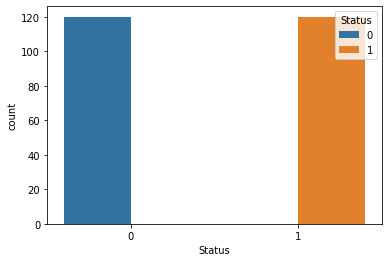

In [96]:
sns.countplot(x="Status",hue="Status", data=data)

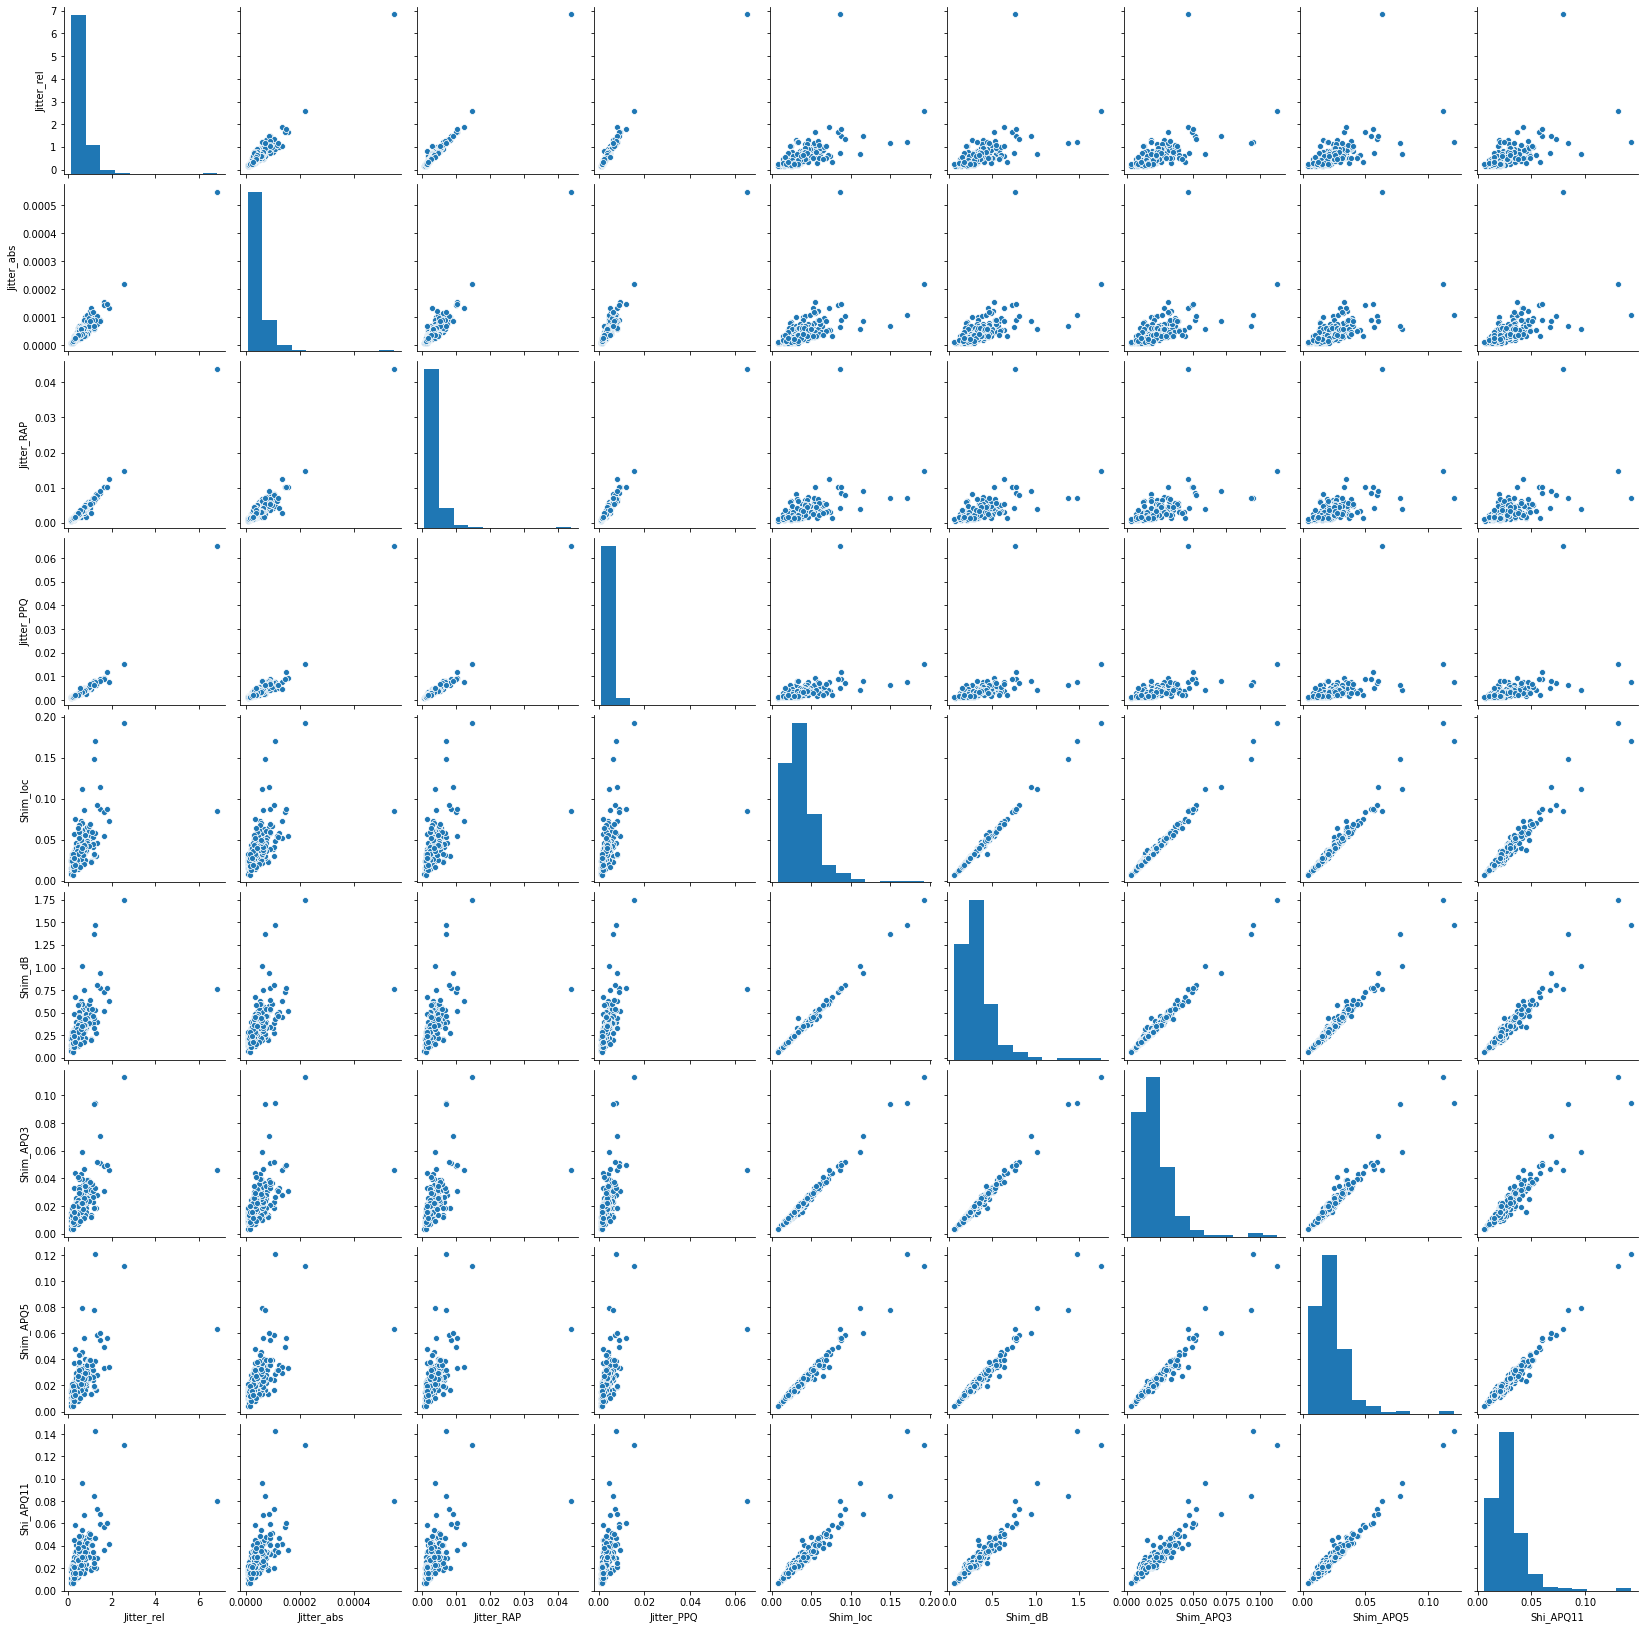

In [97]:
sns.pairplot(data,x_vars=['Jitter_rel', 'Jitter_abs',
       'Jitter_RAP', 'Jitter_PPQ', 'Shim_loc', 'Shim_dB', 'Shim_APQ3',
       'Shim_APQ5', 'Shi_APQ11'],y_vars=['Jitter_rel', 'Jitter_abs',
       'Jitter_RAP', 'Jitter_PPQ', 'Shim_loc', 'Shim_dB', 'Shim_APQ3',
       'Shim_APQ5', 'Shi_APQ11'])

<AxesSubplot:>

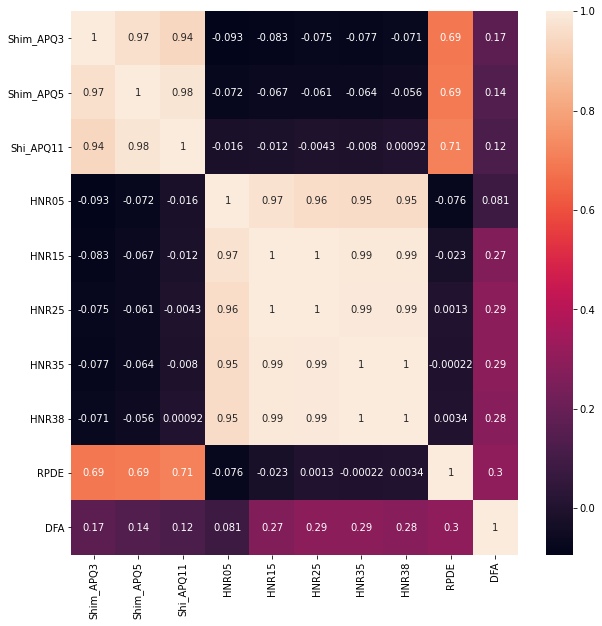

In [98]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(data[data.columns[10:20]].corr(),annot=True)

<AxesSubplot:>

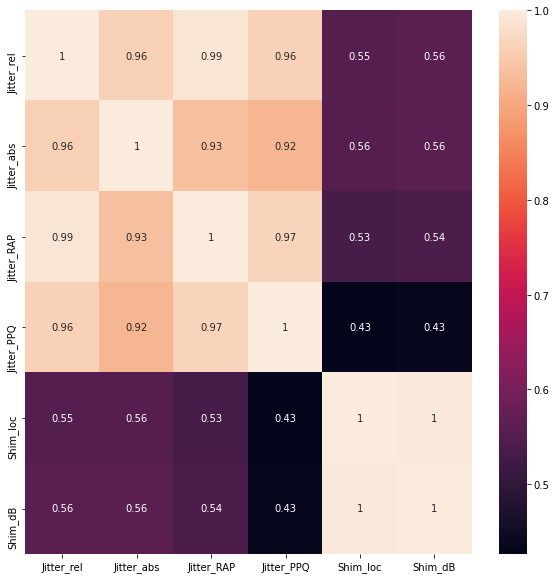

In [99]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(data[data.columns[3:10]].corr(),annot=True)

<AxesSubplot:>

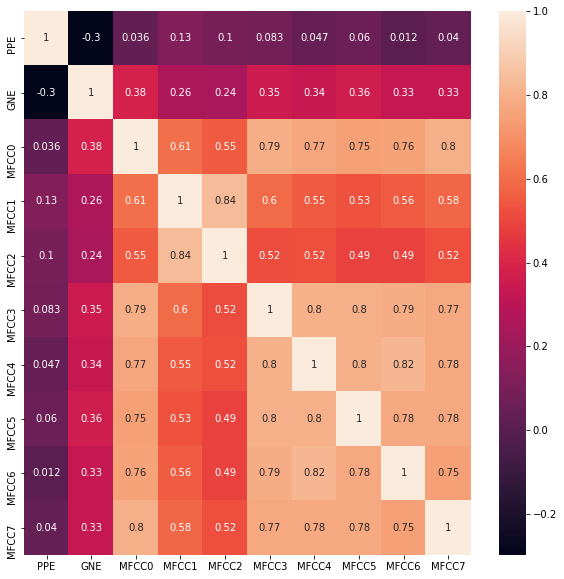

In [100]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(data[data.columns[20:30]].corr(),annot=True)

<AxesSubplot:>

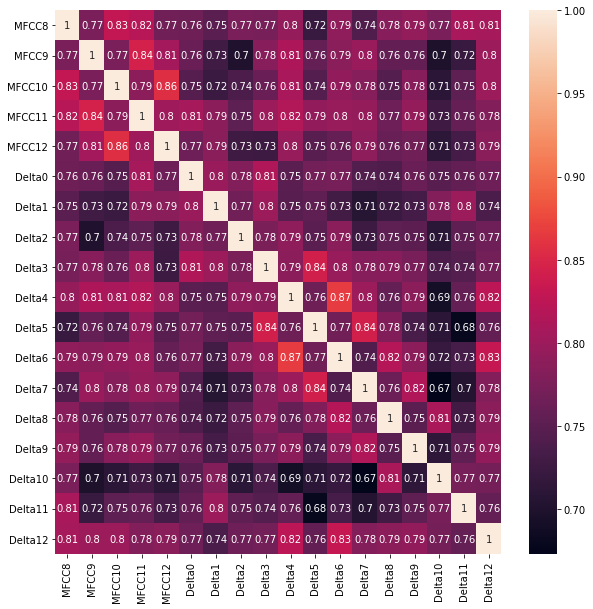

In [101]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(data[data.columns[30:]].corr(),annot=True)

<AxesSubplot:>

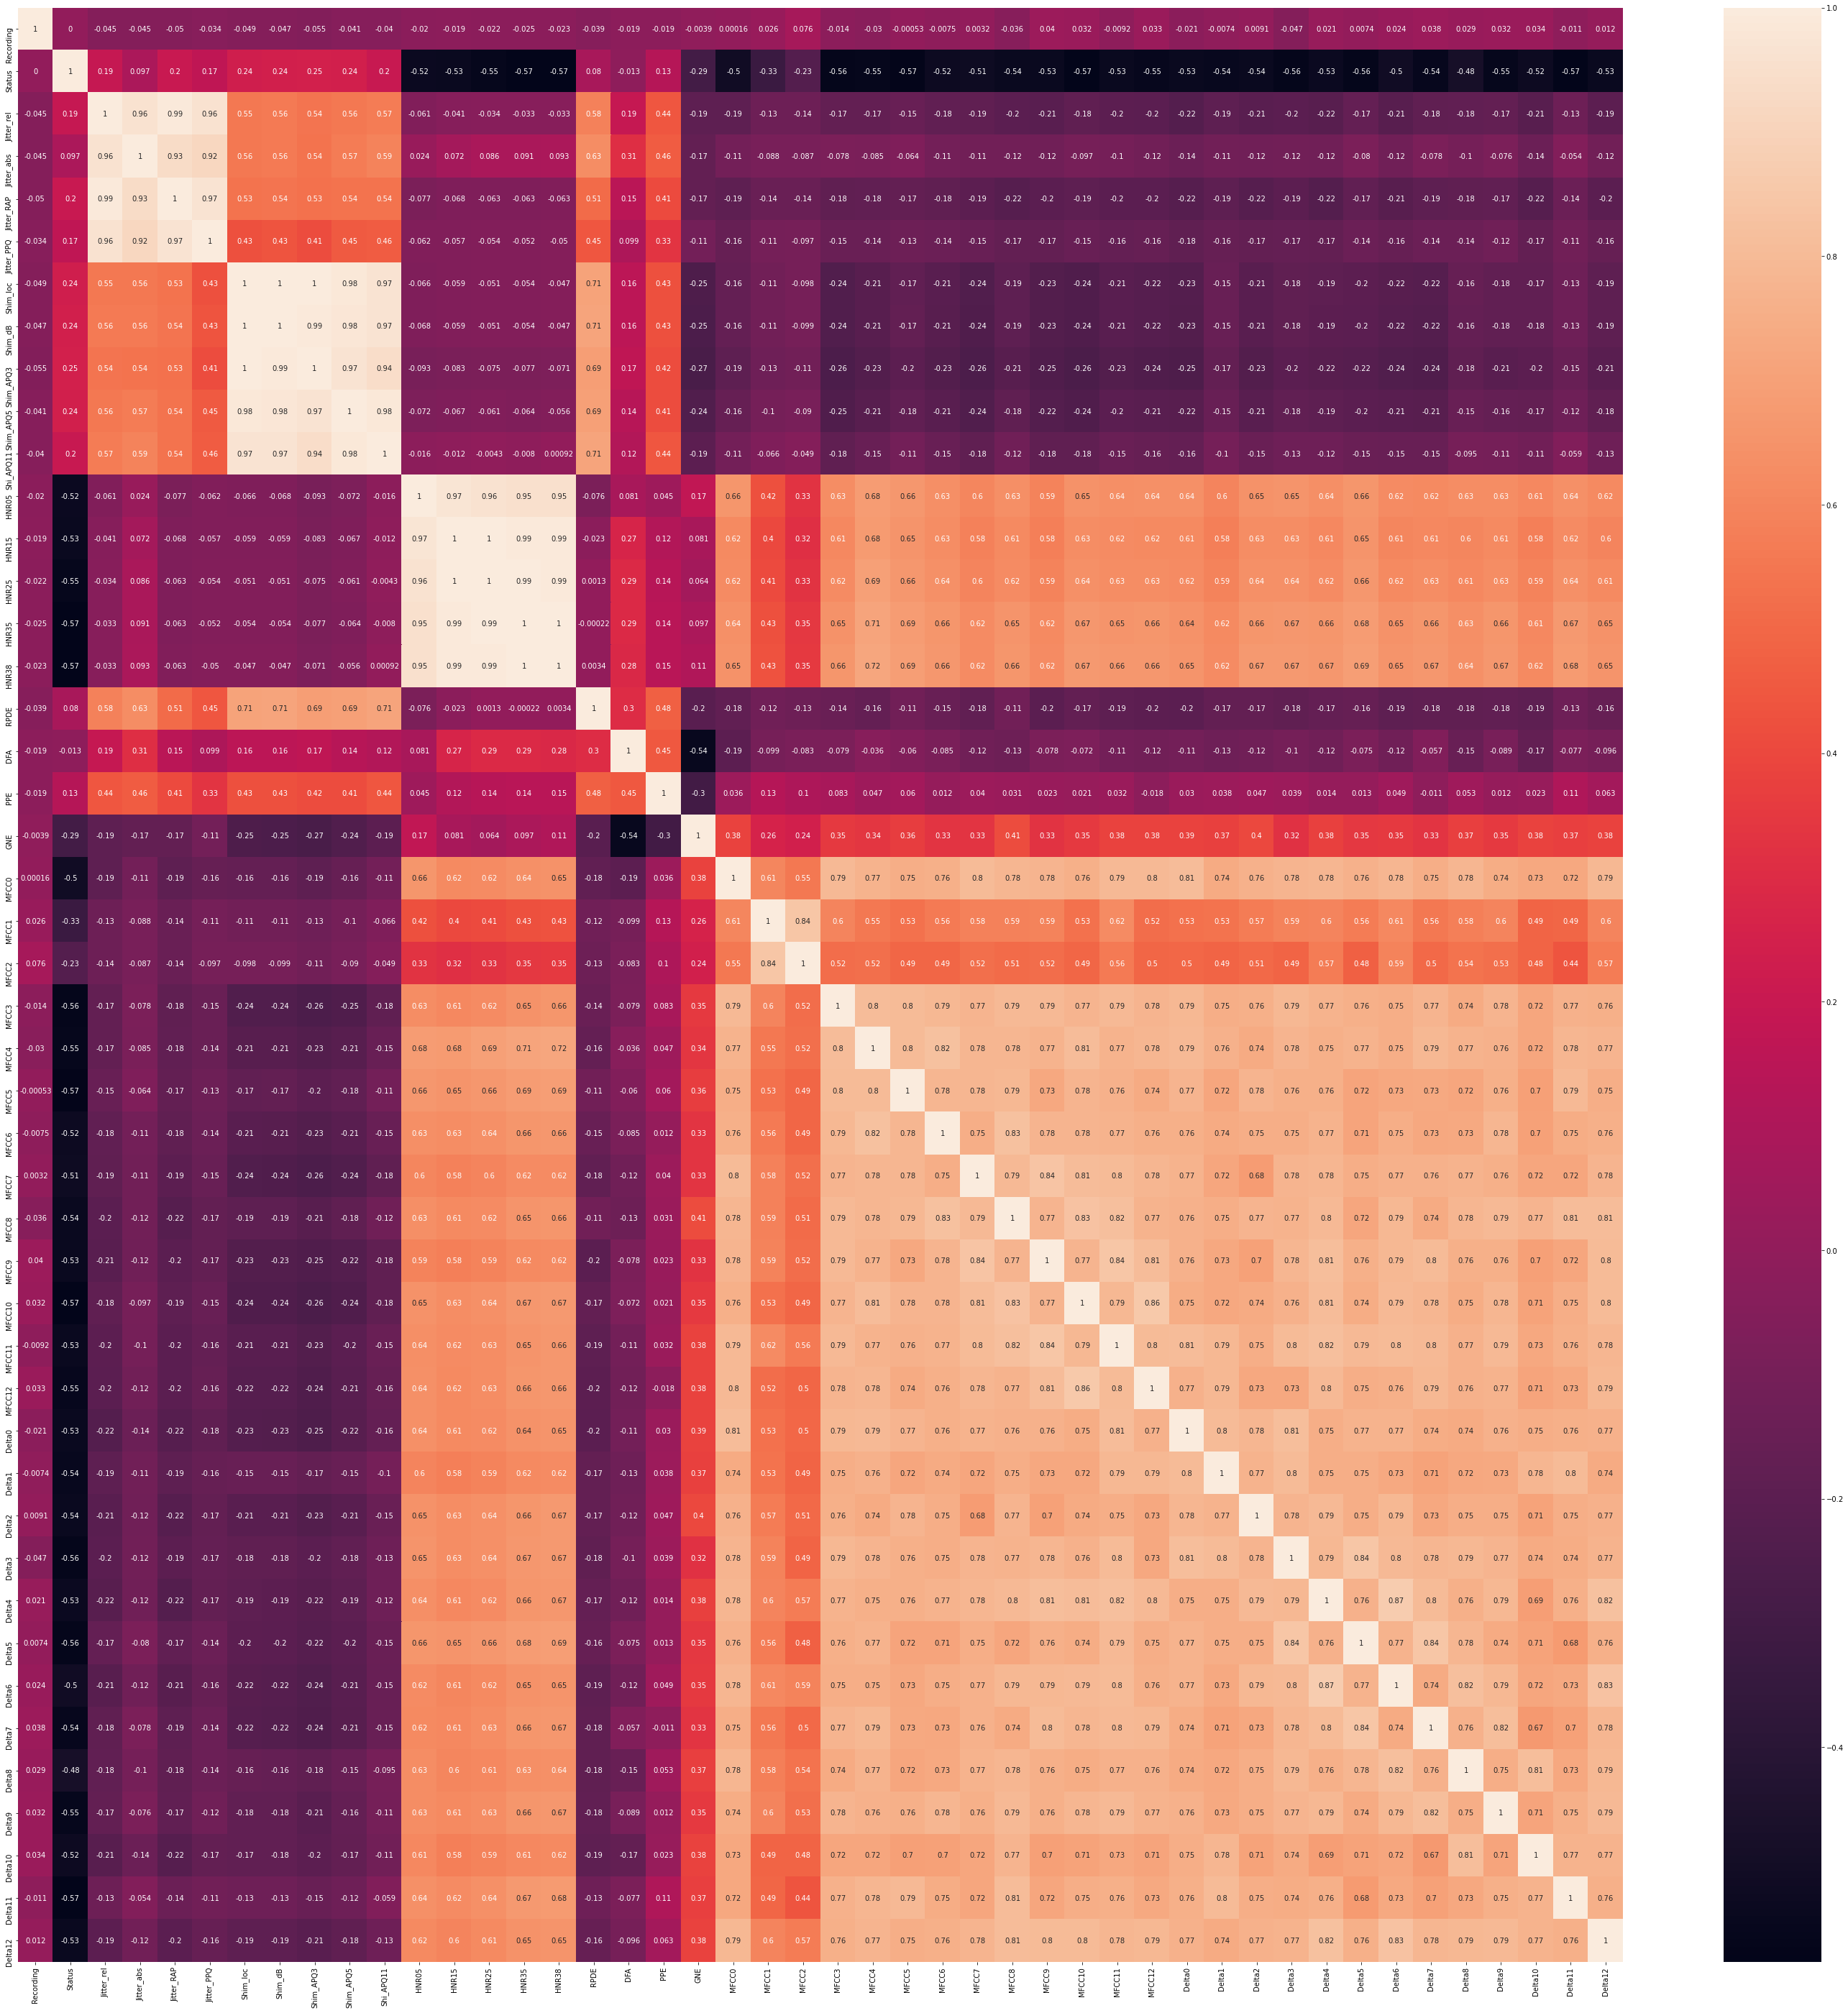

In [102]:
plt.figure(figsize=(50, 50)) 
sns.heatmap(data[data.columns[:]].corr(),annot=True)

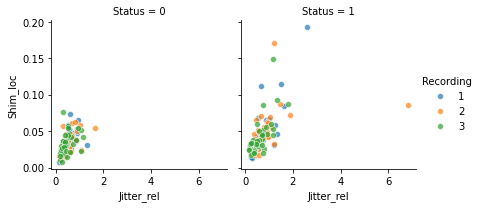

In [103]:
g = sns.FacetGrid(data, col="Status",hue="Recording")
g.map(sns.scatterplot, "Jitter_rel", "Shim_loc", alpha=.7)
g.add_legend()

In [104]:
data['Gender']=data["Gender"].replace(to_replace="Male",value=0)
data['Gender']=data["Gender"].replace(to_replace="Female",value=1)

In [105]:
Y_data=data['Status']
X_data=data.drop(data[['ID','Status']],axis=1)
X_data.shape

(240, 46)

In [106]:
x_train,x_test,y_train,y_test=train_test_split(X_data,Y_data,test_size=0.25,random_state=5)

In [107]:
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 60
number of training samples: 180


# Random Forest

In [108]:
rfc=RandomForestClassifier(n_estimators=250,random_state=42,n_jobs=-1,max_features=7,min_samples_split=2)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [109]:
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))


Confusion Matrix:
 [[26  6]
 [ 8 20]] 

Accuracy: 0.7666666666666667
Overall Precision: 0.7692307692307693
Overall Recall: 0.7142857142857143


In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.77      0.71      0.74        28

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60



<AxesSubplot:>

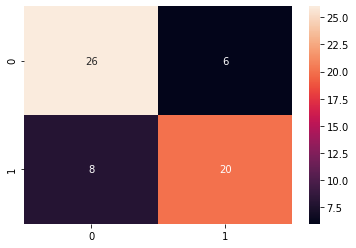

In [111]:
sns.heatmap(cm, annot=True)


AUC: 0.85546875


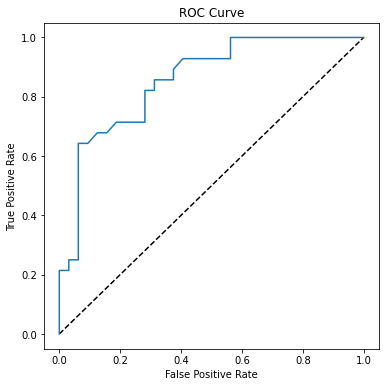

In [112]:
y_scores = rfc.predict_proba(x_test)
#print(y_scores)
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Decision Tree

In [113]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print("Performance result for Decision Trees Algorithm: ",dtc.score(x_test,y_test))


Performance result for Decision Trees Algorithm:  0.7


In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



Confusion Matrix:
 [[22 10]
 [ 8 20]] 

Accuracy: 0.7
Overall Precision: 0.6666666666666666
Overall Recall: 0.7142857142857143


<AxesSubplot:>

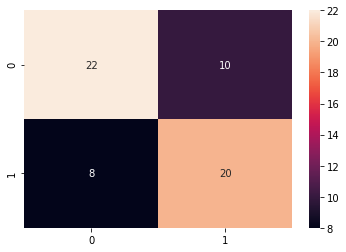

In [115]:
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))
sns.heatmap(cm, annot=True)

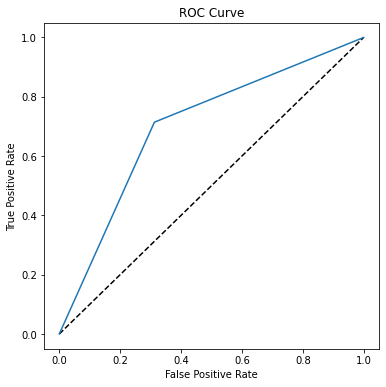

In [116]:
y_scores = dtc.predict_proba(x_test)
#print(y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

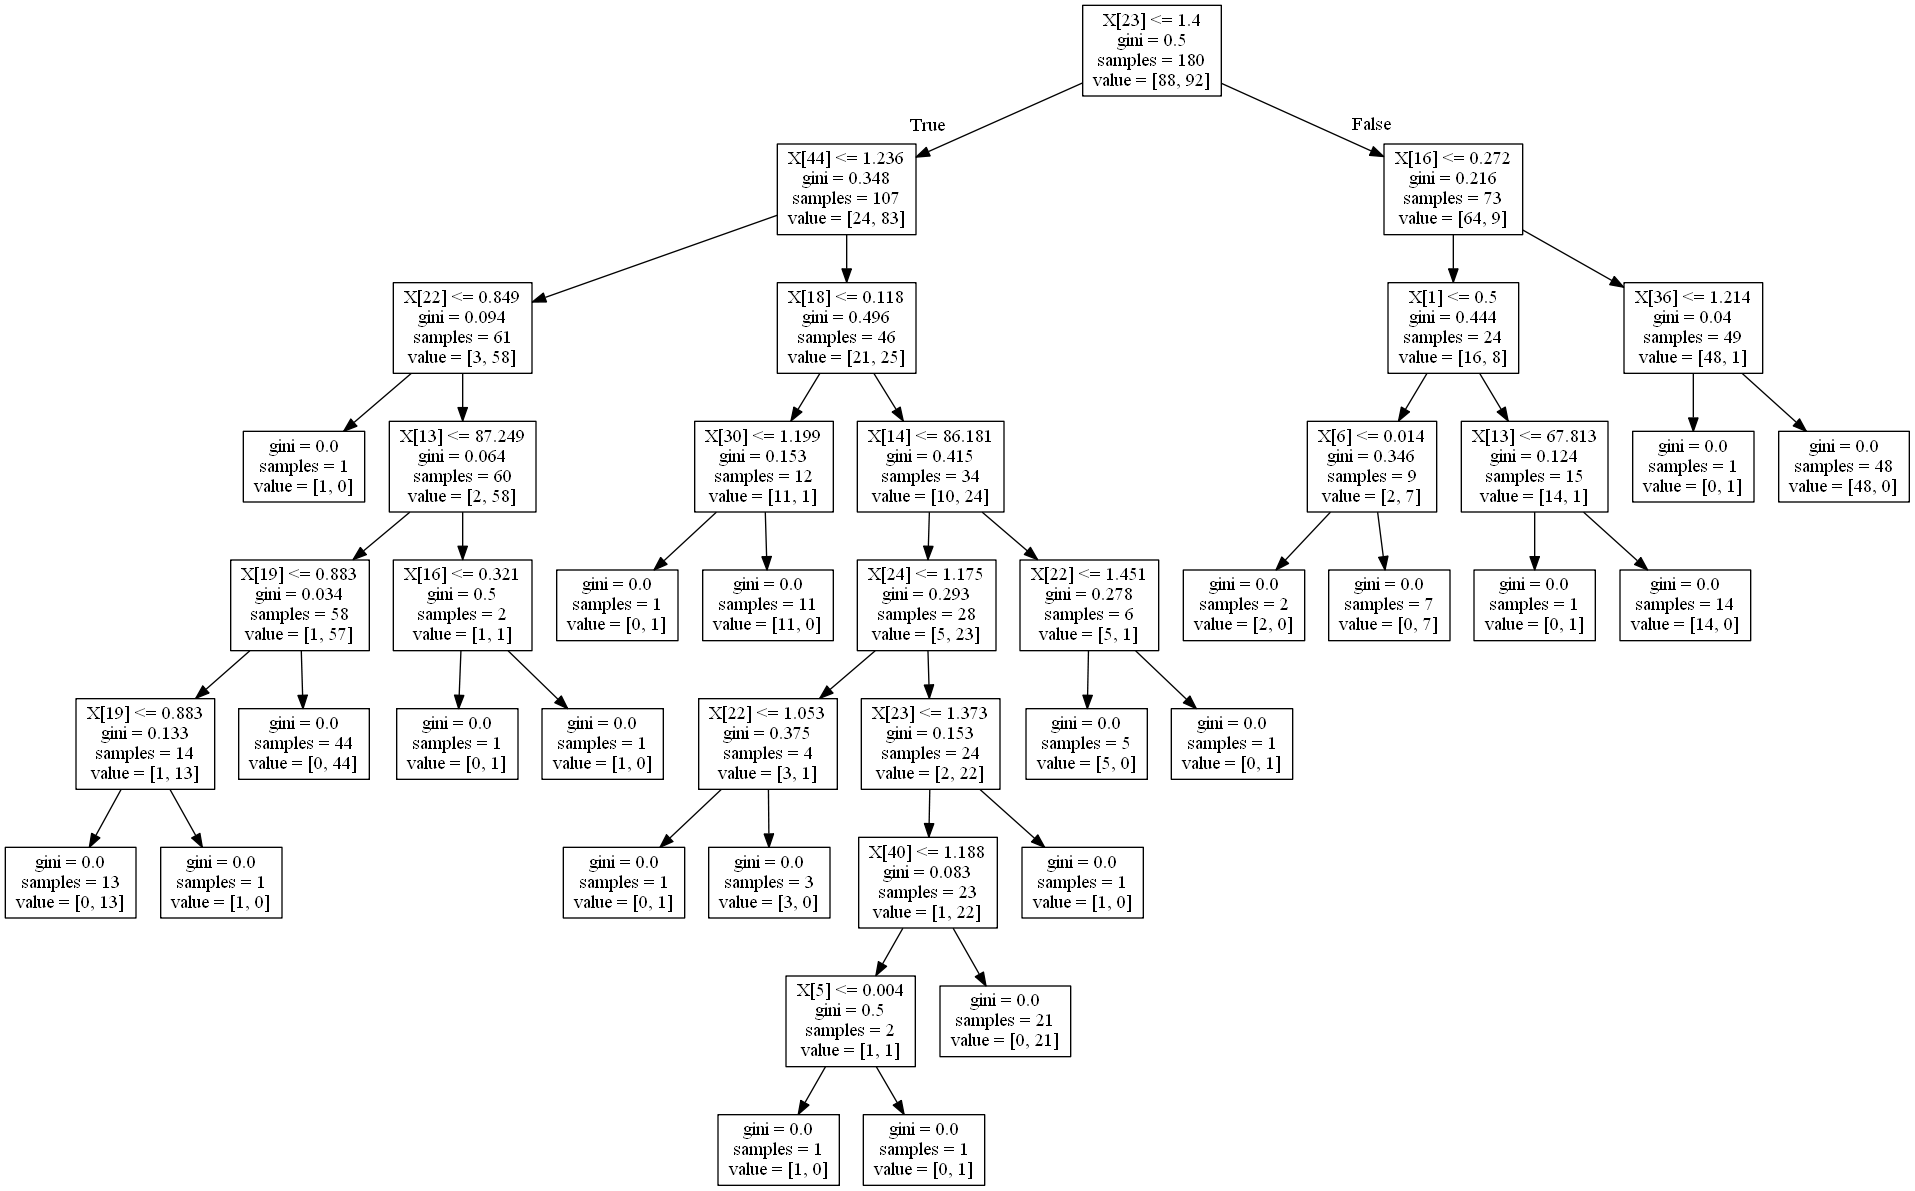

In [117]:
dot_data=export_graphviz(dtc,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Bagging Classifier

In [118]:
bag=BaggingClassifier(base_estimator=dtc,n_estimators=100,bootstrap=True,n_jobs=-1,random_state=42)
bag.fit(x_train,y_train)
y_pred=bag.predict(x_test)
bag.score(x_test,y_test)
accuracy_score(y_test,y_pred)

0.7166666666666667

Confusion Matrix:
 [[24  8]
 [ 9 19]] 

Accuracy: 0.7166666666666667
Overall Precision: 0.7037037037037037
Overall Recall: 0.6785714285714286


<AxesSubplot:>

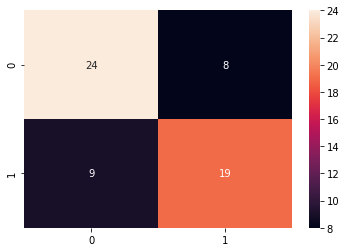

In [119]:
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))
sns.heatmap(cm, annot=True)

# Support Vector Machine

In [120]:
svc = SVC(kernel='rbf',C=30,gamma=0.01,probability=True)
svc.fit(x_train, y_train)
y_pred =svc.predict(x_test)
print("SVM algorithm success result: ",svc.score(x_test,y_test))

SVM algorithm success result:  0.7666666666666667


In [121]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



Confusion Matrix:
 [[24  8]
 [ 6 22]] 

Accuracy: 0.7666666666666667
Overall Precision: 0.7333333333333333
Overall Recall: 0.7857142857142857


<AxesSubplot:>

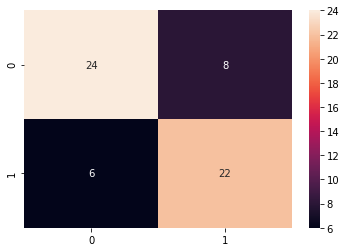

In [122]:
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))
sns.heatmap(cm, annot=True)


AUC: 0.8616071428571428


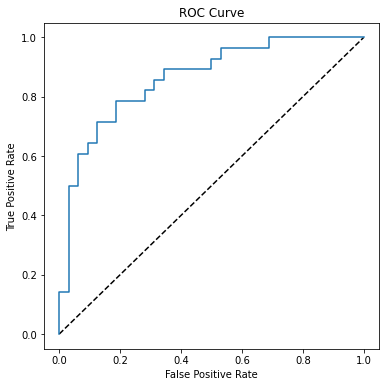

In [123]:
y_scores = svc.predict_proba(x_test)
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Gaussian Naive Bayes

In [124]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

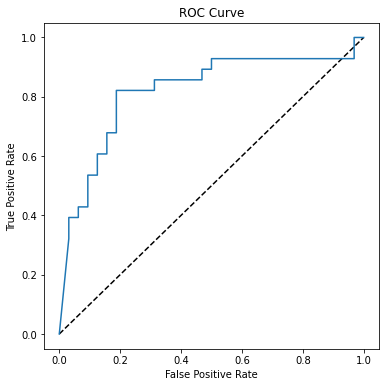

In [125]:
y_scores = nb.predict_proba(x_test)
#print(y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [126]:
print(classification_report(y_test, y_head))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



Confusion Matrix:
 [[26  6]
 [ 5 23]] 

Accuracy: 0.8166666666666667
Overall Precision: 0.7931034482758621
Overall Recall: 0.8214285714285714


<AxesSubplot:>

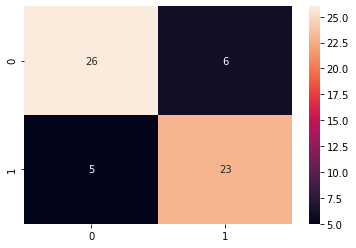

In [127]:
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))
sns.heatmap(cm, annot=True)

In [128]:
score=cross_val_score(svc,X_data,Y_data,cv=3)
np.mean(score)

0.7583333333333333

In [129]:
parma={'C':(0.01,0.05,0.1,0.5,1,5,30,50),'gamma':(0.001,0.005,0.01,0.05,0.1,0.5)}
m=SVC(kernel='rbf')
p=GridSearchCV(m,parma,n_jobs=-1,cv=3,verbose=1,scoring='accuracy')

In [130]:
p.fit(x_train,y_train)
p.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    4.3s finished


{'C': 30, 'gamma': 0.01}

In [131]:
gd=GradientBoostingClassifier(learning_rate=0.07,n_estimators=100,max_depth=2)
gd.fit(x_train,y_train)
gd.score(x_test,y_test)

0.8

In [132]:
parma1={'max_features':(4,5,7,8,9),'min_samples_split':(2,5,10)}
rfc=RandomForestClassifier(n_estimators=250,random_state=42,n_jobs=-1)
p=GridSearchCV(rfc,parma1,n_jobs=-1,cv=3,scoring='accuracy')

In [133]:
p.fit(x_train,y_train)
p.best_params_

{'max_features': 7, 'min_samples_split': 2}

In [134]:
parma2={
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    }
clf = GridSearchCV(GradientBoostingClassifier(), parma2, cv=10, n_jobs=-1)

In [135]:
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.best_params_)

exception calling callback for <Future at 0x1f133006908 state=finished returned list>
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 347, in __call__
    self.parallel.dispatch_next()
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 780, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 529, in apply_async
    future = self._workers.submit(SafeFunction(func))
AttributeError: 'NoneType' object has no attribute 'submit'


KeyboardInterrupt: 

exception calling callback for <Future at 0x1f13300a8d0 state=finished returned list>
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 347, in __call__
    self.parallel.dispatch_next()
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 780, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 529, in apply_async
    future = self._workers.submit(SafeFunction(func))
AttributeError: 'NoneType' object has no attribute 'submit'
exception calling callback for <F